In [107]:
import pickle as cPickle
#import gzip
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
import cv2

In [ ]:
import time
from IPython.display import clear_output
dirPath = os.path.join("ASL","signs")
# нужно только для работы в jupyter

for i in range(0,100):
    # читаем букву
    sign = input().upper()
    print(sign)
   
    # Путь до каталога
    signPath = os.path.join(dirPath, sign)    
    if not os.path.exists(signPath):
        os.makedirs(signPath)
    
    # Читаем изображение
    cap = cv2.VideoCapture(0)
    time.sleep(2)
    for i in range(0,10):
         # читаем время
        currentTime = datetime.datetime.now()
        strTime = currentTime.strftime("%d.%m.%Y-%H:%M:%S")
        retr = cap.grab()
        ret, frame = cap.retrieve(retr)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(signPath, '%s.jpg' %strTime), gray)
        imshow(gray)
        show()
        clear_output(wait=True)
        time.sleep(0.5)
    cap.release()
    # Display the frame until new frame is available
    clear_output(wait=True)    
    if sign == 'quit':
        break

In [44]:
dirPath = os.path.join("ASL","signs")    
import os
signs = ''
trainingX = []
trainingY = []
training = []
width = 100
height = 100
for fl in os.listdir(dirPath):
    fname = os.path.join(dirPath,fl)
    base=os.path.basename(fname)
    symbol = os.path.splitext(base)[0]  
    im = cv2.imread(fname,0)
    ret,im = cv2.threshold(im,127,1,cv2.THRESH_BINARY_INV)
    im = cv2.resize(im,(width,height))
    imgB = np.asarray(im).reshape(-1)
    trainingX.append(imgB)
    trainingY.append(symbol)
    signs += symbol
    pass
signs = sorted(signs)
# signs.index('z')
# print(width,height)
training.append(trainingX)
training.append(trainingY)
# print(training[0][1])

# for el in training[0][0]:
#      print (el)
# len(training[0][0])
# len(im)

In [31]:
def vectorized_result(j,size):
    e = np.zeros((26, size))
#     print('j:',j)
#     print('size',size)
    cnt=0
    for i in j:
        idx = signs.index(i)
        e[idx][cnt] = 1.0
        cnt+=1
    return e

In [86]:
# Xdisplay = np.reshape(training[0][0],(width,height))
# y = vectorized_result(training[1][0:3],3)
# # pl.imshow(Xdisplay,cmap='Greys')
# X = np.float32(training[0][0:3])

In [91]:
class Neural_Network(object):
    def __init__(self,width,height):        
        self.inputLayerSize = width*height
        self.outputLayerSize = 26
        self.hiddenLayerSize = 30
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        delta2 = np.float32(np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2))
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1, dJdW2
    
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [93]:
NN = Neural_Network(width,height)

In [95]:
X = np.float32(training[0][0])
y = vectorized_result(training[1][0],2)
yHat = NN.forward(X)
cost = NN.costFunction(X,y.T)
print(cost)

9.770751540915619


In [99]:
costarr=[]
for i in range(0,500):
    for j in range(0,len(training[0]),2):
#     for j in range(0,10,2): # len(training[0]),2):
#         print(j)
        y = vectorized_result(training[1][j:j+2],2)
#         print('y',y.shape)
        X = np.float32(training[0][j:j+2])
#         X = X.reshape(X.shape[0],1)
#         print('X',X.shape)
        cost = NN.costFunction(X,y.T)
        costarr.append(cost)
        dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)
        scalar = 0.7
        NN.W1 = NN.W1 - scalar*dJdW1
        NN.W2 = NN.W2 - scalar*dJdW2
# print(costarr)

Text(0,0.5,'Cost')

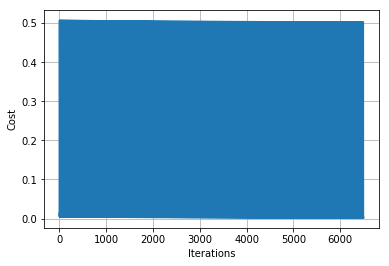

In [100]:
plot(costarr)
grid(1)
xlabel('Iterations')
ylabel('Cost')
# print (costarr)

In [128]:
X = np.float32(training[0][0:10])
result=NN.forward(X)
result=np.around(result, decimals = 2)
print(result)
yarr=training[1][0:10]
res=[np.argmax(i) for i in  result]
print("res",res)
print([signs[sign] for sign in res])
print('yarr',yarr)
sum(int(x == y) for (x, y) in list(zip(res,yarr)))

[[0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.01 0.01 0.98 0.   0.   0.   0.01 0.01 0.01 0.   0.   0.  ]
 [0.04 0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.01 0.92
  0.01 0.   0.   0.   0.01 0.   0.   0.02 0.04 0.   0.   0.  ]
 [0.94 0.   0.   0.01 0.   0.01 0.05 0.   0.   0.   0.   0.   0.   0.04
  0.   0.01 0.   0.01 0.   0.   0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.97 0.02 0.   0.   0.   0.01 0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.   0.   0.
  0.   0.   0.   0.   0.   0.02 0.95 0.   0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.01 0.02 0.   0.   0.01 0.01 0.98]
 [0.01 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.
  0.02 0.97 0.01 0.   0.   0.   0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.03 0.02 0.   0.   0.   0.   0. 

0

Предсказываемый символ n


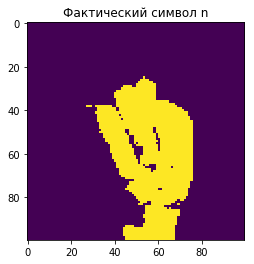

Предсказываемый символ a


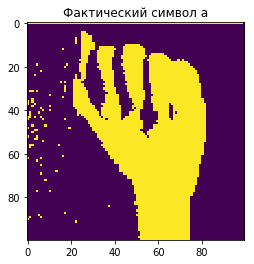

Предсказываемый символ o


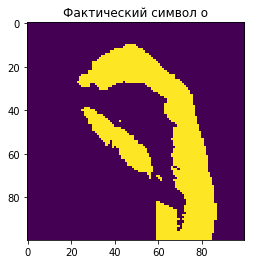

Предсказываемый символ u


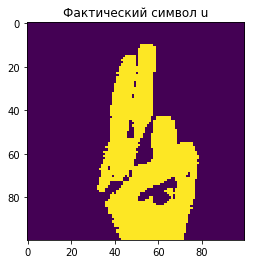

Предсказываемый символ z


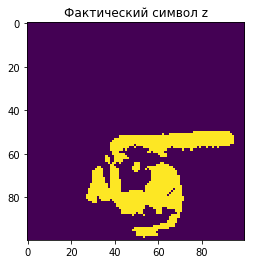

In [139]:
for i in range(1,6):
    X = np.float32(training[0][i])
    Xdisplay = np.reshape(training[0][i],(width,height))
    show()
    pl.imshow(Xdisplay) #,cmap='Greys')
    pl.title("Фактический символ %s" %training[1][i])
    result=NN.forward(X)
    result=np.around(result, decimals = 2)
    res = np.argmax(result)
    print("Предсказываемый символ", signs[res])

In [102]:
%matplotlib inline
import cv2
from IPython.display import clear_output

In [143]:
try:
#     cap = cv2.VideoCapture(0)
    cap = cv2.VideoCapture(0)
    while(1):
        # Capture frame-by-frame
        ret, frame = cap.read()
        frame = cv2.resize(frame,(width,height))
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower = np.array([-10,13,15])
        upper = np.array([15,255,255])
        mask = cv2.inRange(hsv, lower, upper)
        res = cv2.bitwise_and(frame,frame, mask= mask)
        
        X = np.asarray(mask).reshape(-1)
        result=NN.forward(X)
        result=np.around(result, decimals = 2)
        res = np.argmax(result)
        
        pl.imshow(mask) #,cmap='Greys')
        pl.title("Предсказываемый символ %s" %signs[res])
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    cap.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource
